In [4]:
import tensorflow as tf
import os
import cv2
import imghdr

gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

data_dir = 'D:\\Image Classification\\data'
image_exts = ['jpeg', 'jpg', 'bmp', 'png']

for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            if img is None:
                print('Could not read image: {}'.format(image_path))
                os.remove(image_path)
                continue
                
            img_ext = imghdr.what(image_path)
            if img_ext not in image_exts:
                print('Image not in ext list: {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}: {}'.format(image_path, str(e)))


In [5]:
image_path = os.path.join(data_dir, 'happy', 'happiness.jpg')
img = cv2.imread(image_path)

if img is not None:
    print("Image loaded successfully.")
    print("Image shape:", img.shape)
    print("Image type:", type(img))
else:
    print("Failed to load the image.")



Image loaded successfully.
Image shape: (1667, 2420, 3)
Image type: <class 'numpy.ndarray'>


In [6]:
#from matplotlib import pyplot as plt 
#plt.imshow(img)

In [7]:
#plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [8]:
import numpy as np
import tensorflow as tf
data = tf.keras.utils.image_dataset_from_directory('D:/Image Classification/data')

Found 193 files belonging to 2 classes.


In [9]:
data_iterator = data.as_numpy_iterator()

In [10]:
batch = data_iterator.next()

In [11]:
#images represenated as numpy images
batch[0].shape

(32, 256, 256, 3)

In [12]:
#class 1 = SAD PEOPLE
#class 0 = HAPPY PEOPLE
batch[1]

array([1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 1])

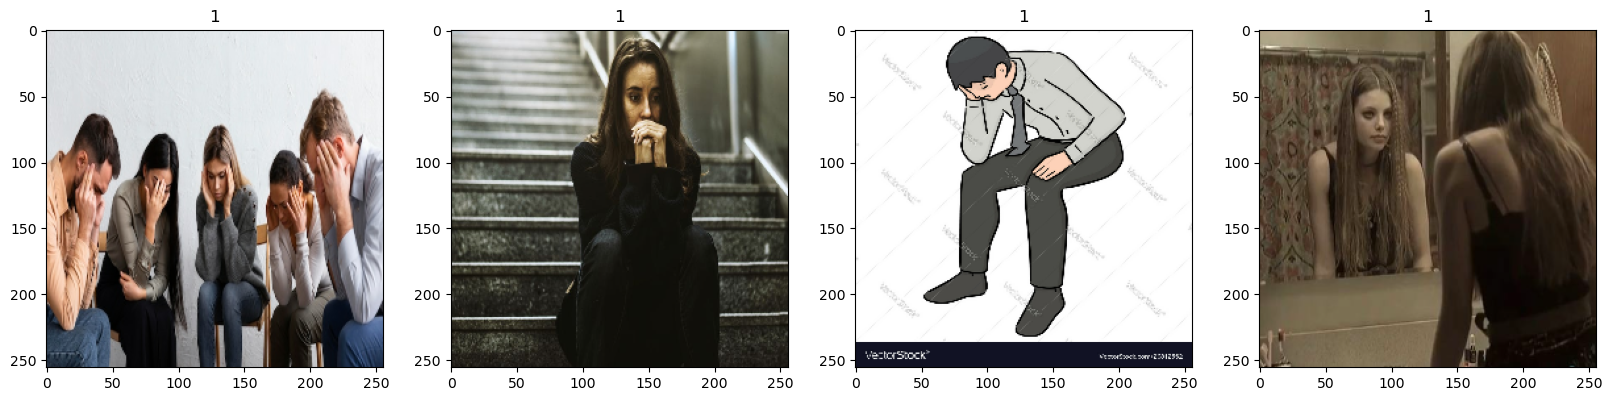

In [13]:
from matplotlib import pyplot as plt
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    #ax[idx].imshow(img)
    #ax[idx].title.set_text(batch[1][idx])
    normalized_img = (img - np.min(img)) / (np.max(img) - np.min(img))
    
    # Display the normalized image
    ax[idx].imshow(normalized_img)
    ax[idx].title.set_text(batch[1][idx])
plt.show()

In [14]:
#scaled = batch[0]/255

In [15]:
#scaled.min()

In [16]:
#scaled.max()
#divide the batch by 255 to scale it
#but this method would have to be done for every batch which is tedious

In [17]:
data_iterator = data.as_numpy_iterator()
batch = data_iterator.next()


In [19]:
# Calculate and print min and max values before scaling
min_after_scaling_values = []
max_after_scaling_values = []

for batch in data_iterator:
    x_batch, _ = batch
    min_batch = np.min(x_batch)
    max_batch = np.max(x_batch)
    min_after_scaling_values.append(min_batch)
    max_after_scaling_values.append(max_batch)

min_after_scaling = np.min(min_after_scaling_values)
max_after_scaling = np.max(max_after_scaling_values)

print("After scaling - Min:", min_after_scaling, "Max:", max_after_scaling)



""""
data = data.map(lambda x,y : (x/255, y))
scaled_iterator =data.as_numpy_iterator()
scaled_iterator.next()"""

After scaling - Min: 0.0 Max: 255.0


'"\ndata = data.map(lambda x,y : (x/255, y))\nscaled_iterator =data.as_numpy_iterator()\nscaled_iterator.next()'

In [21]:
for batch in data_iterator:
    x_batch, _ = batch
    min_batch = np.min(x_batch)
    max_batch = np.max(x_batch)
    print("Batch - Min:", min_batch, "Max:", max_batch)


In [22]:
batch[0].min()

0.0

In [23]:
batch[0].max() #value lies between 0 and 1

254.85434

In [24]:
len(data)

7

In [25]:
train_size =int(len(data)*.7)
val_size =int(len(data)*.2)+1
test_size =int(len(data)*.1)+1

In [26]:
train_size+val_size+test_size

7

In [27]:
train= data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [29]:
model = Sequential()
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(Dense(1, activation='sigmoid'))

In [30]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

In [32]:
logdir='D:\Image Classification\logs'

In [33]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [34]:
hist=model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
4/4 [==============================] - 12s 2s/step - loss: 268.4557 - accuracy: 0.5391 - val_loss: 32.0717 - val_accuracy: 0.5312
Epoch 2/20
4/4 [==============================] - 8s 2s/step - loss: 15.2246 - accuracy: 0.4688 - val_loss: 11.5671 - val_accuracy: 0.4531
Epoch 3/20
4/4 [==============================] - 9s 2s/step - loss: 5.7909 - accuracy: 0.5000 - val_loss: 0.5997 - val_accuracy: 0.7344
Epoch 4/20
4/4 [==============================] - 8s 2s/step - loss: 0.5539 - accuracy: 0.6797 - val_loss: 0.3892 - val_accuracy: 0.8750
Epoch 5/20
4/4 [==============================] - 9s 2s/step - loss: 0.5075 - accuracy: 0.7734 - val_loss: 0.4679 - val_accuracy: 0.7812
Epoch 6/20
4/4 [==============================] - 9s 2s/step - loss: 0.3961 - accuracy: 0.8359 - val_loss: 0.3742 - val_accuracy: 0.8594
Epoch 7/20
4/4 [==============================] - 9s 2s/step - loss: 0.3523 - accuracy: 0.8828 - val_loss: 0.2986 - val_accuracy: 0.9531
Epoch 8/20
4/4 [===================

In [35]:
hist.history

{'loss': [268.4557189941406,
  15.224567413330078,
  5.790917873382568,
  0.553857684135437,
  0.5075086355209351,
  0.3961012065410614,
  0.35232287645339966,
  0.3115125298500061,
  0.21378551423549652,
  0.15527695417404175,
  0.10770566761493683,
  0.07412441074848175,
  0.03134496510028839,
  0.02627279981970787,
  0.015278265811502934,
  0.009827949106693268,
  0.0029091383330523968,
  0.0007448493270203471,
  0.002188417362049222,
  0.1442221999168396],
 'accuracy': [0.5390625,
  0.46875,
  0.5,
  0.6796875,
  0.7734375,
  0.8359375,
  0.8828125,
  0.90625,
  0.953125,
  0.9609375,
  0.984375,
  0.9765625,
  0.9921875,
  0.9921875,
  0.9921875,
  0.9921875,
  1.0,
  1.0,
  1.0,
  0.984375],
 'val_loss': [32.07167053222656,
  11.567092895507812,
  0.599666178226471,
  0.38919395208358765,
  0.46794959902763367,
  0.3742430508136749,
  0.2985871434211731,
  0.2266935110092163,
  0.19876322150230408,
  0.12954722344875336,
  0.08466731011867523,
  0.05050775781273842,
  0.022186402

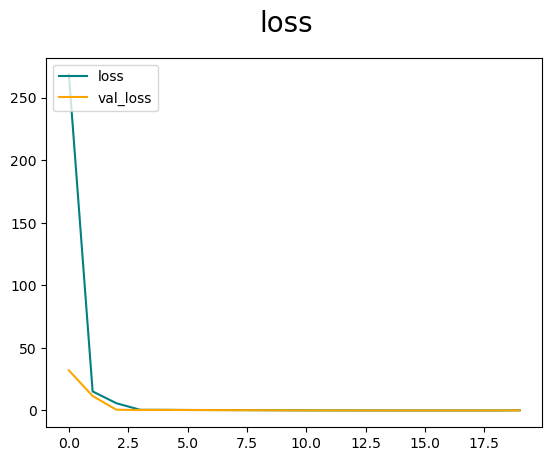

In [37]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('loss', fontsize=20)
plt.legend(loc='upper left')
plt.show()

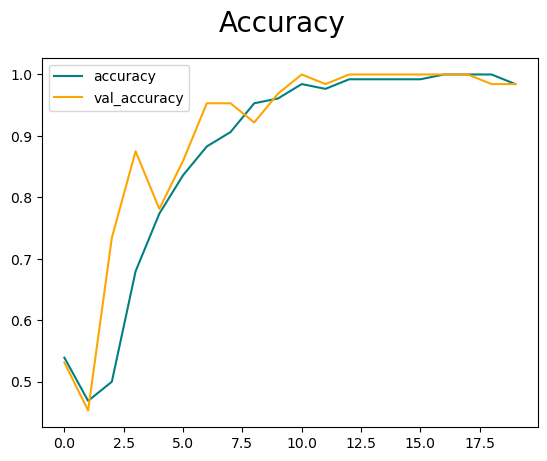

In [38]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc='upper left')
plt.show()

In [39]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [40]:
pre=Precision()
re=Recall()
acc=BinaryAccuracy()

In [41]:
len(test)

1

In [42]:
for batch in test.as_numpy_iterator():
    X, y=batch
    yhat=model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 393ms/step


In [43]:
print(f'Precision:{pre.result().numpy()}, Recall: {re.result().numpy()}, Accuracy: {acc.result().numpy}')

Precision:1.0, Recall: 1.0, Accuracy: <bound method _EagerTensorBase.numpy of <tf.Tensor: shape=(), dtype=float32, numpy=1.0>>


In [44]:
import cv2

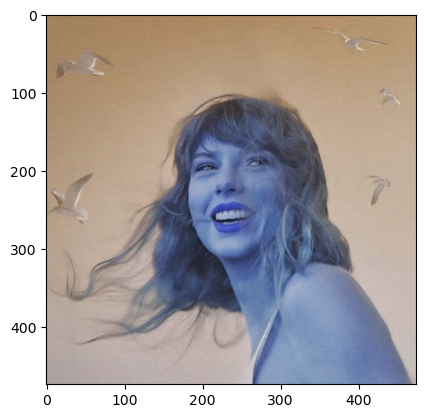

In [45]:
img = cv2.imread('D:\Image Classification\happytest.jpg')
plt.imshow(img)
plt.show()

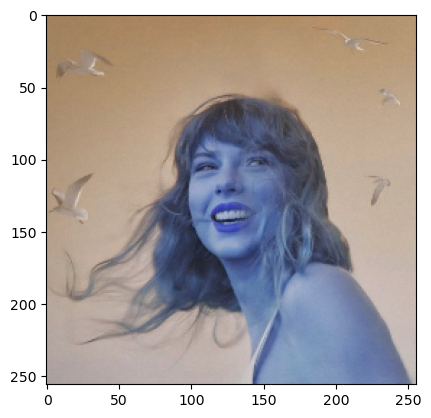

In [47]:
resize=tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [48]:
yhat=model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 61ms/step


In [49]:
yhat

array([[0.49804425]], dtype=float32)

In [50]:
if yhat> 0.5:
    print(f'Predicted class is sad')
else:
    print(f'Predicted class is happy')

Predicted class is happy


In [51]:
from tensorflow.keras.models import load_model

In [52]:
model.save(os.path.join('models', 'happysadmodel.h5'))

In [53]:
new_model=load_model(os.path.join('models', 'happysadmodel.h5'))

In [54]:
new_model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 239ms/step


array([[0.49804425]], dtype=float32)

In [55]:
yhatnew=new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 55ms/step


In [56]:
if yhat> 0.5:
    print(f'Predicted class is sad')
else:
    print(f'Predicted class is happy')

Predicted class is happy
